In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import scipy.optimize as op
import api
import matplotlib.pyplot as plt

In [2]:
def get_decision_boundary(theta):
    u = np.linspace(-1, 1.5, 50).reshape(50,1)
    v = np.linspace(-1, 1.5, 50).reshape(50,1)
    z = np.zeros((len(u), len(v)))
    for i in range(0,len(u)):
        for j in range(0,len(v)):
            z[i,j]=api.map_features([u[i,:]], [v[j,:]],6) @ theta
    return (u,v, z.T)

def visualize(F,theta, yIdx,title):
    true_recs = F[F[:,yIdx] == 1,:]
    false_recs = F[F[:,yIdx] == 0,:]
    a,b,z = get_decision_boundary(theta)
    a,b =np.meshgrid(a,b)

    plt.figure(figsize=(16,8))
    cp = plt.contour(a,b,z, levels=[0.0],colors='b', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    plt.scatter(true_recs[:,0],true_recs[:,1],marker='+',color='g')
    plt.scatter(false_recs[:,0],false_recs[:,1],marker='o',color='r')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.title(title)
    plt.legend(('Passed', 'Not Passed','DB'))
    plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
    plt.show()
def run(lmda):
    data = np.genfromtxt('../data/raw/ex2data2.txt',delimiter=",")
    X = api.map_features(data[:,0].reshape(len(data),1), data[:,1].reshape(len(data),1),6)
    m,n=X.shape
    y = data[:,2].reshape(m,1)    
    theta = np.zeros((n,1))
    res = op.minimize(fun=api.cost_regularized,x0=theta,args=(X,y,lmda),method='CG',options={'maxiter': 400})
    theta = res.x.reshape(len(res.x),1)
    visualize(data,theta,2,f'Lamda : {lmda}')

### 1. Overfitting

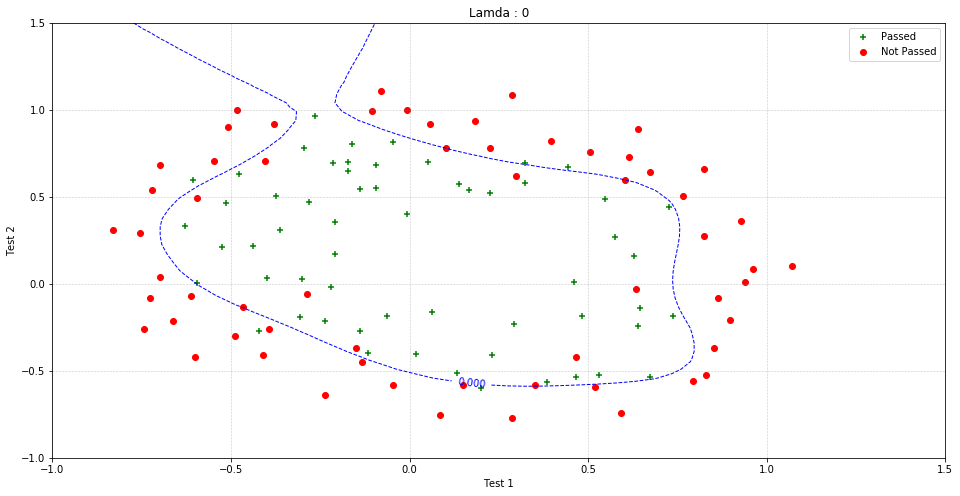

In [3]:
run(0)

### 2. Just right

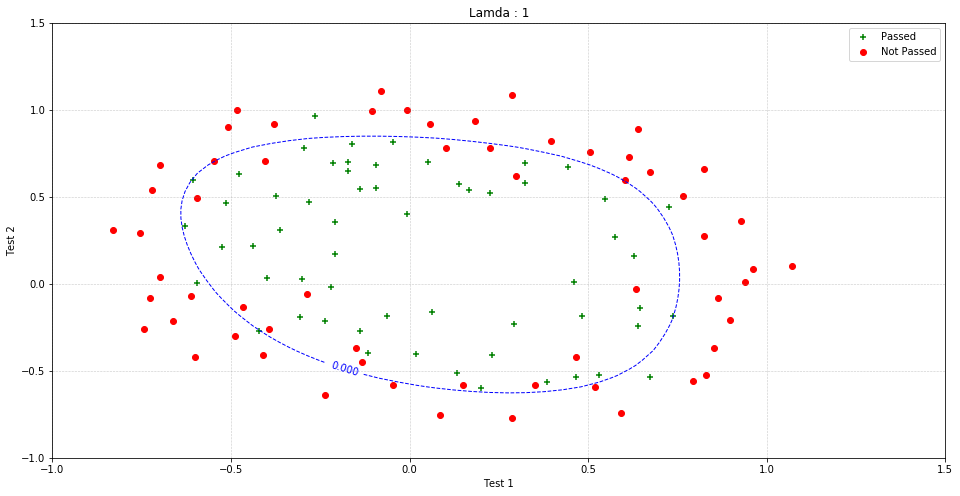

In [4]:
run(1)

### 3. Undefitting

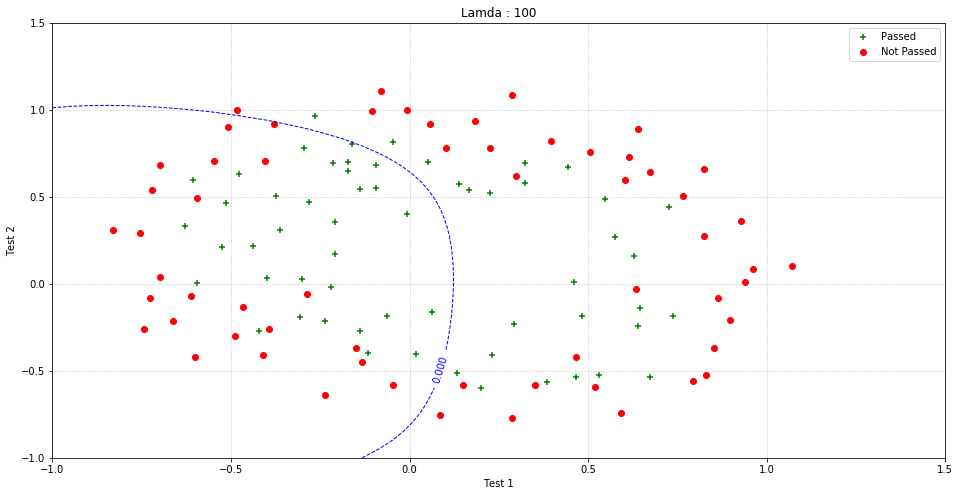

In [5]:
run(100)